In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

In [2]:

df = pd.read_csv('games.csv')


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
df_duplicados = df.duplicated().sum()
print(f'valores duplicados {df_duplicados}')

valores duplicados 0


In [5]:
df_nulos = df.isna().sum()
print(f'valores nulos \n\n{df_nulos}')

valores nulos 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [6]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
df['name'].fillna('desconocidos',inplace=True)


C:\Users\Criz1\AppData\Local\Temp\ipykernel_18232\1920213142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('desconocidos',inplace=True)


reemplazamos estos valoros por que solo el nombre no esta en nustros datos, si llegaramos a eliminar este dato podria afectar e otros datos importantes donde si tenemos relleno de informacion 

In [8]:
df['year_of_release']= df['year_of_release'].fillna(0).astype('int')

year of release estaba marcad como un float ya que ese basa en fechas lo cambiamos a int para poder trabajar de formaa mas facil sin que tuvieramos problemas con ellos en algunas modificaciones 

In [9]:
df['genre'].fillna('Genero desconocido', inplace=True)

C:\Users\Criz1\AppData\Local\Temp\ipykernel_18232\2731932136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Genero desconocido', inplace=True)


los generos de igual modo influyen aun que no haya un dato conciso puede que al eliminar esto le restemos valor a datos importante 

In [10]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float')

C:\Users\Criz1\AppData\Local\Temp\ipykernel_18232\1330541897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_score'].replace('tbd', np.nan, inplace=True)


user score se cambio a flotante porque nos basamos a calificaciones cuyos puntajes pueden tener decimales que afectan de forma importante a la hora de tomar  en cuenta en algun momento la columna de user score ,un detalle tambien seria el "tbd" por la  razon de que es una calificacion no podemos solo reemplazar con 0 asi que los dejamos en valores nulos hasta que se determine su calificacion para no afectar los datos despues.  

In [11]:
df['rating'].fillna('rating desconocido', inplace=True)

C:\Users\Criz1\AppData\Local\Temp\ipykernel_18232\2452144407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('rating desconocido', inplace=True)


no podemos eliminar una fila llena de datos relevantes por solo faltar el rating ay puede que este juego no sea valorado aun asi que lo mantendremos como desconocido para que no afecte en su eliminacion en otros factores

puede que haya valore ausentes por la falta de la valoracion en ratings ya sea por la fecha de salida de un videojugo y  tambien por la falta de registros en los nombres y se les haya atribuido una venta sin un registro previo 

In [12]:
df['total_sales'] = df[['jp_sales','eu_sales','na_sales', 'other_sales']].sum(axis=1)

aqui tomaremos las venteas totales de todas las regiones para tener una visualizacion mas concreta de nuestras ventas por un videojuego 

In [13]:
games_for_year = df.groupby('year_of_release',)['name'].count().sort_values().reset_index()
games_for_year.columns = ['year_of_release','number_of_videogames']
games_for_year.query('year_of_release !=0', inplace=True)
games_for_year.head(15)


,year_of_release,number_of_videogames
0,1980,9
1,1984,14
2,1985,14
3,1988,15
4,1987,16
5,1990,16
6,1983,17
7,1989,17
8,1986,21
9,1982,36


en esta tabla agrupamos el año de lanzamiento y el numero de videojuegos vendidos y los ordenamos de menor a mayor 

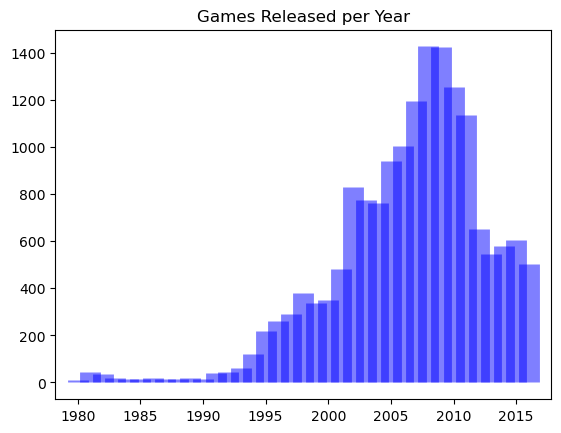

In [14]:
plt.vlines(x=games_for_year['year_of_release'], ymin=0, ymax=games_for_year['number_of_videogames'], alpha=0.5, color='blue', linewidth=15)

plt.title("Games Released per Year")  
plt.show()

en esta tabla visualizamos en que años hubo mayor numero de videojuegos lanzados esto nos da parte a ver en que año podemos remontarnos para hacer un analicis de ventas
en el caso siguiente seria 2005 a 2012 donde se ven mayores lanzamientos 

In [15]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
print(platform_sales.head())

  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


en esta tabla especificamos que plataformas son las mas vendidas en todas las regiones en general asi mismo visualizamos que ps2 se lleva l primer puesto a pesar de la diferencia de años con consolas mas modernas como puede ser X360 o incluso su predecesor PS3        

In [16]:
platform_sales['z_score'] = (platform_sales['total_sales'] - platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()

In [17]:
platform_sales['color'] = ['red' if score <= 0 else 'green' for score in platform_sales['z_score'] ]

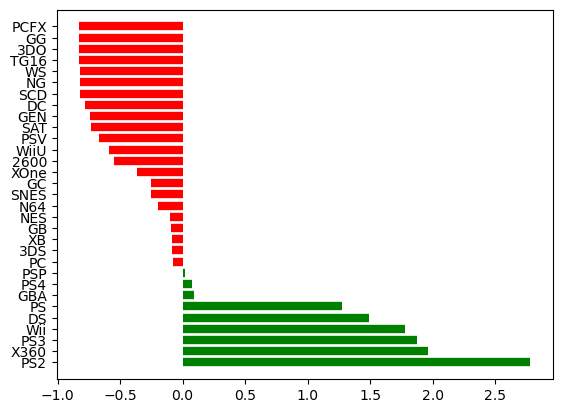

In [18]:
plt.hlines(y=platform_sales.platform,
xmax=platform_sales.z_score,
xmin=0,
color = platform_sales.color,
linewidth = 6,           
            )

en esta tabla nos vasamos en todas las platarformas poniendo como meta la media, proponiendonos a ver que plataforma fueron rentables basandonos en sus ventas totales 

In [19]:
platform_life = pd.pivot_table(df,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',
).fillna(0).reset_index()


In [20]:
platform_life.query('year_of_release > 0', inplace=True)
platform_life

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
1,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,1989,0.63,0.00,0.00,0.00,0.00,64.97,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
platform_analysis = df[df['year_of_release'] >= 2008]
platform_analysis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,rating desconocido,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,rating desconocido,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,rating desconocido,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,rating desconocido,0.01


en esta tabla vamos a tomar referencias del 2008 en adelante que serian un ejemplo de nuestra anterior grafica sobre los años de lanzamientos y numeros de videojuegos sacados por año y donde vemos mas aumento significativo   

In [22]:
new_platform_life = platform_analysis.pivot_table(index = 'year_of_release', columns= 'platform', values='total_sales', aggfunc= 'sum').fillna(0)
new_platform_life

platform,3DS,DC,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,
2008,0.00,0.04,145.31,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.00,0.00,85.02,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2011,63.20,0.00,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2012,51.36,0.00,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
2013,56.57,0.00,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
2014,43.76,0.00,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07
2015,27.78,0.00,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,0.00,60.14
2016,15.14,0.00,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,0.00,26.15


aqui agrupamos tanto ventas como plataformas del 2008 en adelante para visualizar los datos mas desglosados y claros para una mejor interpetacion 

<Axes: xlabel='year_of_release'>

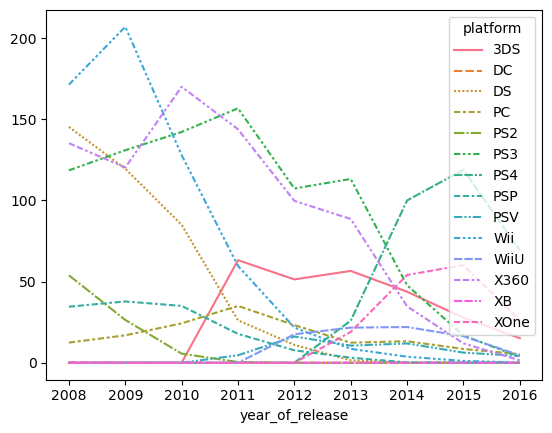

In [23]:
sns.lineplot(data=new_platform_life)

en la siguiente tabla podemos observar los años de apogeo de las plataformas desde cual fue su mejor año hasta su decadencia en ventas curiosamente clara generacion dee consolas tiene aproximadamente 6 años de vida por lo que es primordial empezar con una nueva generacion para que las ventas no caigan tan negativamente 

In [24]:
box_plot_analyst = platform_analysis.groupby(['year_of_release', 'platform']).agg({'total_sales' : 'sum'}).reset_index() 
box_plot_analyst  

,year_of_release,platform,total_sales
0,2008,DC,0.04
1,2008,DS,145.31
2,2008,PC,12.42
3,2008,PS2,53.90
4,2008,PS3,118.52
...,...,...,...
76,2016,PSV,4.25
77,2016,Wii,0.18
78,2016,WiiU,4.60
79,2016,X360,1.52


<Axes: xlabel='platform', ylabel='total_sales'>

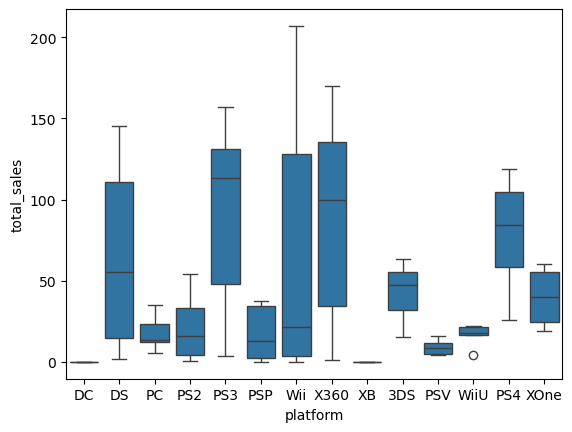

In [25]:
sns.boxplot(data=box_plot_analyst, x='platform', y='total_sales')

en el boxplot vemos el desempeño de cada plataforma con las ventas las cuales vemos una variacion en las ventas significativamente diferentes las unas de las otras y las ventas promedio tambien cambian en pocos casos son similares 

In [26]:
XOne_data = platform_analysis.groupby(['platform','name'])[['total_sales' , 'critic_score', 'user_score']].sum().query('platform == "XOne" & critic_score > 0 & user_score > 0').reset_index()
XOne_data

,platform,name,total_sales,critic_score,user_score
0,XOne,7 Days to Die,0.05,35.0,5.2
1,XOne,Agatha Christie's The ABC Murders,0.01,66.0,7.5
2,XOne,Alien: Isolation,0.50,78.0,7.8
3,XOne,Angry Birds Star Wars,0.17,53.0,6.9
4,XOne,Assassin's Creed Syndicate,1.29,78.0,6.1
...,...,...,...,...,...
160,XOne,Wolfenstein: The Old Blood,0.15,75.0,8.0
161,XOne,Worms: WMD,0.01,75.0,8.1
162,XOne,XCOM 2,0.04,87.0,8.1
163,XOne,Zombie Army Trilogy,0.11,62.0,7.2


en esta tabla desglosamos 3 factores importantes para ver si influyende alguna manera tomamos las columnas de ventas totales  el critic score y el user score para ver que tanto afectan estas opiniones en las ventas 

In [27]:
XOne_corr = XOne_data['total_sales'].corr(XOne_data['critic_score'])

print('la correlacion entre la paltaforma y el critic score es de ', XOne_corr)

la correlacion entre la paltaforma y el critic score es de  0.41042203561296414


<Axes: xlabel='critic_score', ylabel='total_sales'>

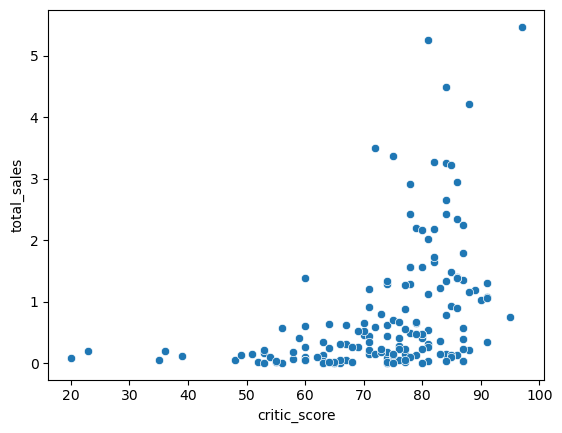

In [28]:
sns.scatterplot(data = XOne_data, x='critic_score', y= 'total_sales')

In [29]:
XOne_corr_user = XOne_data['total_sales'].corr(XOne_data['user_score'])
XOne_corr_user

-0.09400318326920867

<Axes: xlabel='user_score', ylabel='total_sales'>

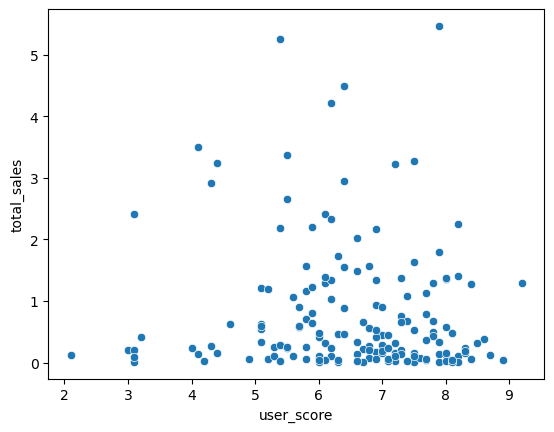

In [30]:
sns.scatterplot(data = XOne_data, x='user_score', y= 'total_sales')

aqui verificamos la correlacion de que hay en los 3 factores antes mencionados y vemos que de alguna  en el user score la correlacion es negativa pero hay algunas excepciones por mas baja que sea la calicacion en muy pocos caos hay buenas ventas y en calificaciones reegulares tambien, en el critic score vemos casos similares al el user score pero se inclina mas hacia mejor puntaje mejor es la venta de aquel videojuego 

In [31]:
def correlacion(platforms):
    data = platform_analysis[platform_analysis['platform'] == platforms]
    corr = data[['critic_score', 'user_score','total_sales']].corr()['total_sales']

    data.plot(y='total_sales', x= 'critic_score', kind='scatter', grid=True)
    plt.title(platforms)

    data.plot(y='total_sales', x= 'user_score', kind='scatter', grid=True)
    plt.title(platforms)

    print(platforms , corr)
    print('...........')  

ahora vamos a declarar una funcion para enerar las mismas tablas pero en todas las plataformas para tenerlas en cuenta tambien y las mismas correlaciones asi ampliamos un poco mas el panorama de las plataformas

In [32]:
data_genre = platform_analysis.groupby(['genre', 'name'])['total_sales'].sum().reset_index()
data_genre.query('1 < total_sales< 10', inplace=True )

PS4 critic_score    0.406568
user_score     -0.031957
total_sales     1.000000
Name: total_sales, dtype: float64
...........
wiiU critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64
...........
Wii critic_score    0.225109
user_score      0.130242
total_sales     1.000000
Name: total_sales, dtype: float64
...........
X360 critic_score    0.388653
user_score      0.101101
total_sales     1.000000
Name: total_sales, dtype: float64
...........
PS3 critic_score    0.433732
user_score      0.115080
total_sales     1.000000
Name: total_sales, dtype: float64
...........
XOne critic_score    0.416998
user_score     -0.068925
total_sales     1.000000
Name: total_sales, dtype: float64
...........


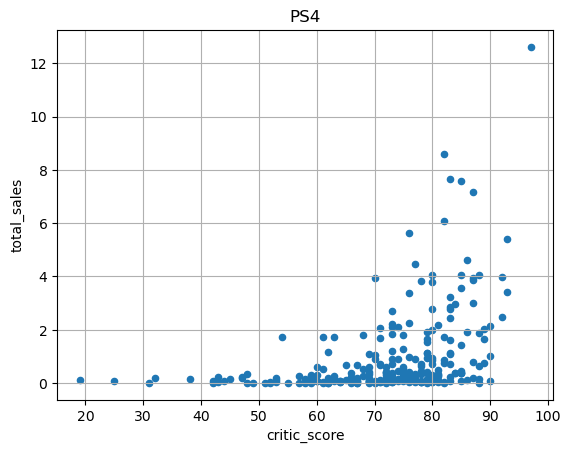

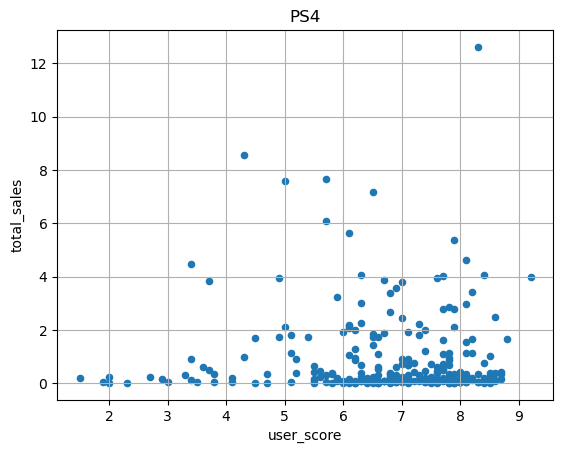

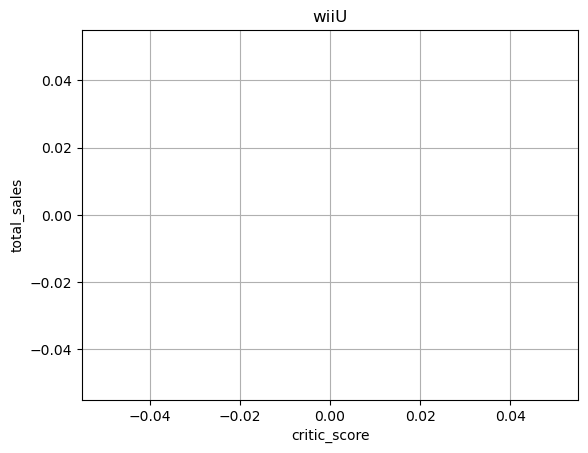

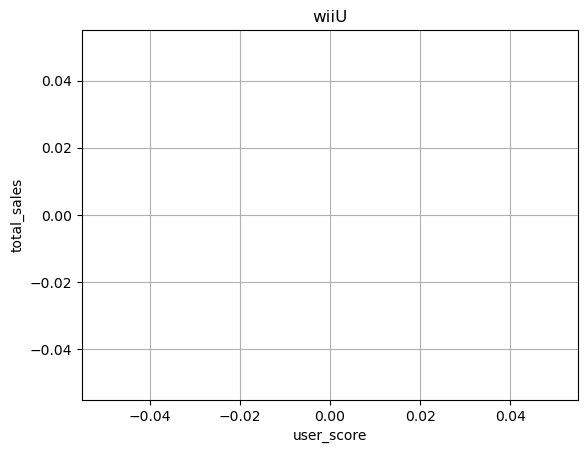

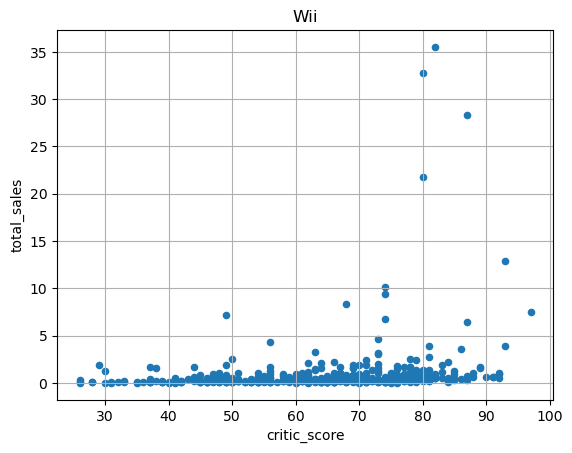

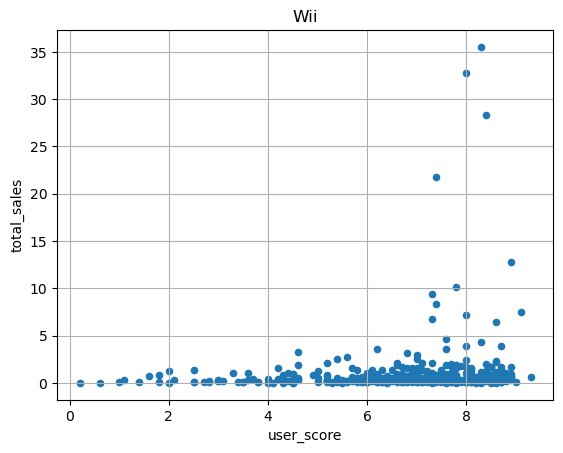

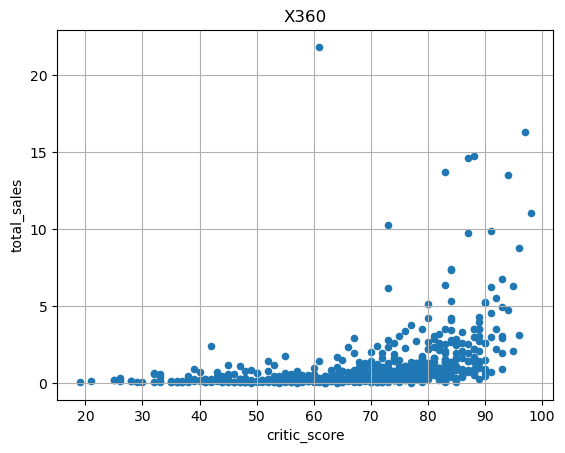

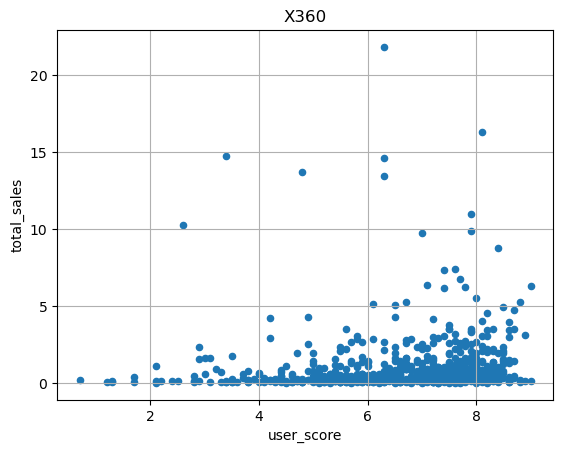

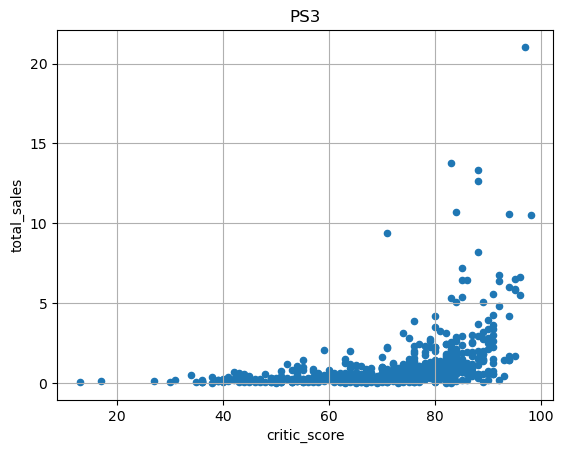

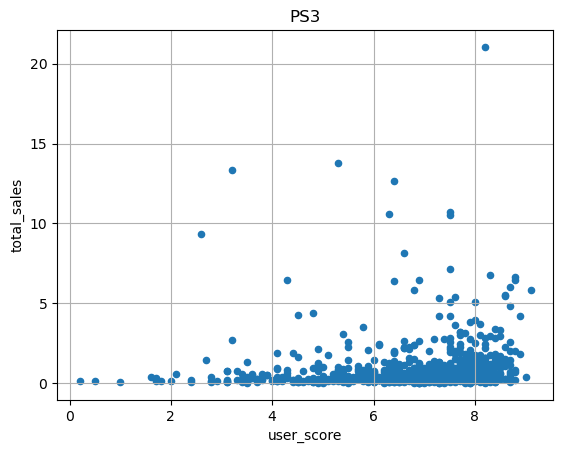

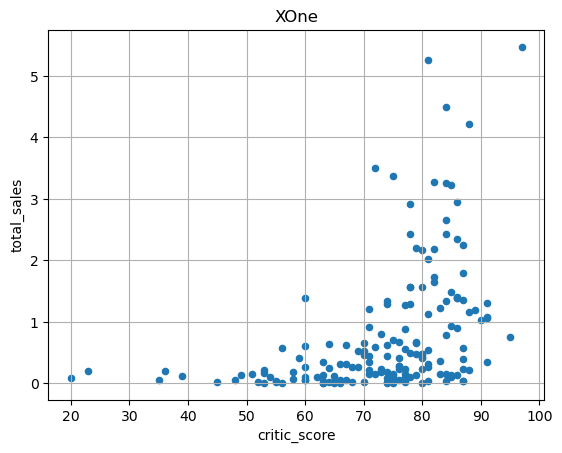

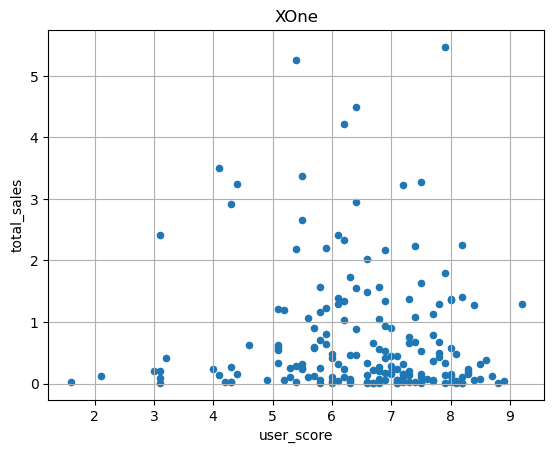

In [33]:
platforms = ['PS4', 'wiiU','Wii','X360', 'PS3', 'XOne' ]
for platform in platforms:
     correlacion(platform)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fighting'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Strategy')])

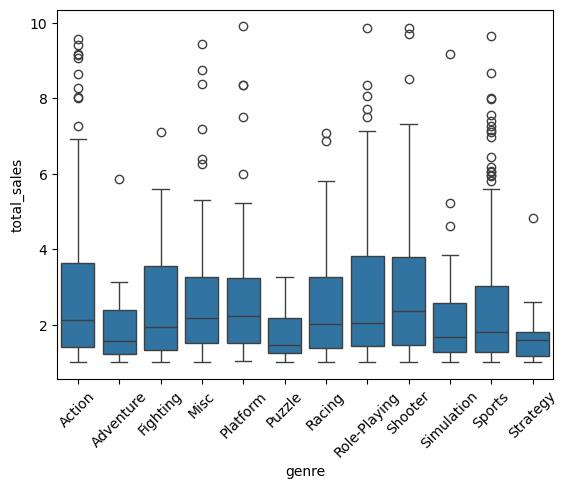

In [34]:
sns.boxplot(data=data_genre, x='genre', y='total_sales',)
plt.xticks(rotation=45)

en el siguiente diagrama de caja vamos a analizar los datos de genero de videojuegos en algunos casos las ventas promedio estan a la par por sus objetivos de ventas unos cuantos por de bajo ya que no se espera la misma aceptacion por los usuarios y otros poco suben un poco mas su espectativa 

In [35]:
na_platform = platform_analysis.groupby('platform')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
na_platform.head()

,platform,na_sales
11,X360,490.69
5,PS3,349.13
9,Wii,332.87
2,DS,198.73
6,PS4,108.74


In [36]:
eu_platform = platform_analysis.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
eu_platform.head()

,platform,eu_sales
5,PS3,293.73
11,X360,234.88
9,Wii,170.74
6,PS4,141.09
3,PC,92.17


In [37]:
jp_platform = platform_analysis.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
jp_platform.head()

,platform,jp_sales
0,3DS,100.62
2,DS,76.12
5,PS3,74.11
7,PSP,60.46
9,Wii,47.01


en estas 3 tablas podemos ver las ventas de las regiones por  las 5 mejores plataformas como es obvio no en todas las regiones se venden de manera igual sino que hay diferentes lideres por ejemplo en reiones europeas el ps3 es la lider mientras que en japon el 3ds es su lider de ventas 

In [38]:
na_platform['na_market_share'] = na_platform['na_sales']*100/na_platform['na_sales'].sum()
print(na_platform.head())

eu_platform['eu_market_share'] = eu_platform['eu_sales']*100/eu_platform['eu_sales'].sum()
print(eu_platform.head())

jp_platform['jp_market_share'] = jp_platform['jp_sales']*100/jp_platform['jp_sales'].sum()
print(jp_platform.head())

   platform  na_sales  na_market_share
11     X360    490.69        27.040476
5       PS3    349.13        19.239523
9       Wii    332.87        18.343482
2        DS    198.73        10.951423
6       PS4    108.74         5.992340
   platform  eu_sales  eu_market_share
5       PS3    293.73        24.269390
11     X360    234.88        19.406919
9       Wii    170.74        14.107363
6       PS4    141.09        11.657537
3        PC     92.17         7.615530
  platform  jp_sales  jp_market_share
0      3DS    100.62        23.548961
2       DS     76.12        17.815016
5      PS3     74.11        17.344598
7      PSP     60.46        14.149972
9      Wii     47.01        11.002153


en esta tabla vemos las cuotas de mercado de cada region si lo tomamos como porcentajes xbox 360 se lleva el 27% de las ventas en norte america ps3 24% de las ventas en las regiones europeas  y en japon el 3ds se lleo el 23 % de las ventas 

In [39]:
na_genre = platform_analysis.groupby('genre')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
na_genre.head()

,genre,na_sales
0,Action,433.74
8,Shooter,311.26
10,Sports,276.27
3,Misc,211.61
7,Role-Playing,155.81


In [40]:
eu_genre = platform_analysis.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
eu_genre.head()

,genre,eu_sales
0,Action,310.59
8,Shooter,208.35
10,Sports,185.19
3,Misc,107.00
7,Role-Playing,94.46


In [41]:
jp_genre = platform_analysis.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
jp_genre.head()

,genre,jp_sales
7,Role-Playing,138.12
0,Action,90.16
3,Misc,37.33
10,Sports,30.69
1,Adventure,23.36


hacemos las mismas comparaciones pero ahora con las ventas y  genero para ver que genero es el mas vendido tanto en norte america como en europa el lider es el genero  de accion  y el japon es el rol-play 


In [42]:
na_rating = platform_analysis.groupby('rating')['na_sales'].sum().reset_index().sort_values(by= 'na_sales', ascending=False)
na_rating.head()

,rating,na_sales
0,E,536.93
3,M,502.60
5,T,303.41
1,E10+,251.88
6,rating desconocido,218.51


In [43]:
eu_rating = platform_analysis.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by= 'eu_sales', ascending=False)
eu_rating.head()

,rating,eu_sales
3,M,362.65
0,E,326.61
6,rating desconocido,188.85
5,T,187.62
1,E10+,144.53


In [44]:
jp_rating = platform_analysis.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by= 'jp_sales', ascending=False)
jp_rating.head()

,rating,jp_sales
6,rating desconocido,220.60
0,E,77.17
5,T,64.51
3,M,39.33
1,E10+,25.67


en este caso la clasificacion tambien hace cambios por cada region importantes lo que nos da a ver que no en toda las regiones se tiene permitido ciertos tipos de libertades o visualizaciones y en los 3 casos tambien se consume rating que todavaia no se evalua  

In [45]:
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()


t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)



alpha = 0.05  
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula. Las calificaciones promedio son iguales.")

Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.


en este caso hicimos una hipotesis nula las calificaciones promedio son iguales  una hipotesis alternativa donde sean calificaciones promedio diferentes por lo cual tomando en cuenta nuestro valor p rechazamos la hipotesis nula asi que los puntajes promedio son diferentes 

In [46]:
accion_scores = platform_analysis[platform_analysis['genre'] == 'action']['user_score'].dropna()
deportes_scores = platform_analysis[platform_analysis['genre'] == 'sports']['user_score'].dropna()


t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores)


alpha = 0.05  
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula. Las calificaciones promedio son iguales.")

No rechazamos la hipótesis nula. Las calificaciones promedio son iguales.


en este otro caso nuestra hipotesis nula es basandonos en el genero de accion y sport con el user score dado a que los usuarios tienen mucho criteio en estos puntajes me base en esto entoces nuestra hipotesis nula es si las calificaciones promedio son iguales y nuestra hipotesis alternativa se basa en es si el promedio es diferente 

En conclusion por lo que pudimos analizar no en todas las regiones se consume lo mismo tanto genero como clasificacion influye mucho en es, hay consolas que son dominantes en cada tipo de region no hay un patron que todos sigan por igual ya que tanto gusto y preferencia cambia demasiado a esto le tenemos que sumar que por ende las ventas van a ser completamente diferentes en los mercados de estas regiones en un caso particular podemos ver que ps2 domino como una de las plataformas mas rentables en su tiempo de vida y quee tambien el tiempo de vida de una plataforma es maximos 6 años para despues sacar una nueva generacion y de ahi ira dependiendo las criticas profecionales para su venta ya que muchas personas se basan en puntajes para verificar si estan haciendo una buena compra o no y tal vez dejan su criterio propio a un lado por seguir los puntajes  